In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("DataLab1.csv", sep=";")
data.head()

,Dates,CAC40,MICHELIN,LOREAL,SAFRAN,SODEXO,VIVENDI
0,01/09/2011,3265.83,50.180,75.46,27.775,52.110,16.7274
1,02/09/2011,3148.53,47.805,74.37,27.005,51.500,16.2096
2,05/09/2011,2999.54,45.310,72.52,26.055,49.595,15.5806
3,06/09/2011,2965.64,44.600,72.08,25.150,50.700,15.0871
4,07/09/2011,3073.18,46.960,72.70,27.125,52.090,15.5467


##### We rename the data, convert string to time and compute the log-returns

In [3]:
for col_name in data.keys()[1:]:
    data[col_name + "_ret"] = data[col_name].pct_change()[1:]
data["Dates"]=pd.to_datetime(data['Dates'], format='%d/%m/%Y')
data=data[1:]


We run regressions to obtain the following modele : 
## $R_{i,t} = \alpha_{i} + \beta_iR_{CAC,t} + \epsilon_{i,t}$

In [4]:
from sklearn.linear_model import LinearRegression
ols=LinearRegression



reg_ml=ols().fit(data["CAC40_ret"].values.reshape(-1,1),data["MICHELIN_ret"].values.reshape(-1,1))
reg_ore=ols().fit(data["CAC40_ret"].values.reshape(-1,1),data["LOREAL_ret"].values.reshape(-1,1))
reg_saf=ols().fit(data["CAC40_ret"].values.reshape(-1,1),data["SAFRAN_ret"].values.reshape(-1,1))
reg_sod=ols().fit(data["CAC40_ret"].values.reshape(-1,1),data["SODEXO_ret"].values.reshape(-1,1))
reg_viv=ols().fit(data["CAC40_ret"].values.reshape(-1,1),data["VIVENDI_ret"].values.reshape(-1,1))



y_true_ml=np.array(data["MICHELIN_ret"])
y_true_ore=np.array(data["LOREAL_ret"])
y_true_saf=np.array(data["SAFRAN_ret"])
y_true_sod=np.array(data["SODEXO_ret"])
y_true_viv=np.array(data["VIVENDI_ret"])





/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

Compute the intercepts $\alpha_i$ and take the lowest / highest. We find that the minimum is Sodexo, the maximum is L'Oreal

In [10]:
b0=np.array([reg_ml.intercept_,reg_ore.intercept_,reg_saf.intercept_,reg_sod.intercept_,reg_viv.intercept_])
print(max(b0))
print(min(b0))

[0.00045434]
[-2.37801121e-05]


Starting with an initial value of 100, we can compute the return of our portfolio at time $t$: <br>
$P_t = P_{t-1} + R_{OR,t}(1+R_{SW,t})-R_{SW,t}$

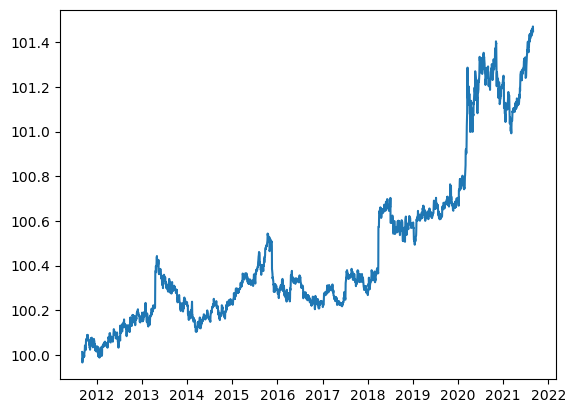

[100.         100.01303483  99.98455188 ... 101.45202549 101.47058951
 101.4502543 ]


In [11]:
pf_value = np.array([100])
for i in range(len(data["LOREAL_ret"])):
    pf_value=np.append(pf_value,np.array([pf_value[-1]+(-data["SODEXO_ret"].values[i]+data["LOREAL_ret"].values[i]*(1+data["SODEXO_ret"].values[i]))]))
import matplotlib.pyplot as plt

plt.plot(data["Dates"],pf_value[1:])
plt.show()
print(pf_value)